### Find the constant columns

In [ ]:
const_cols = [c for c in train_df.columns if train_df[c].nunique(dropna=False)==1 ]

### Alternate to value_counts using groupby 
Both size and count will return the same result except when there are Nan values. 
Count ignores the Nan values

In [2]:
import pandas as pd
df = pd.DataFrame( {
  "Students": ["Ray", "John", "Mole", "Smith", "Jay", "Milli", "Tom", "Rick"],
  "Subjects": ["Maths", "Economics", "Science", "Maths", "Statistics", "Statistics", "Statistics", "Computers"],
  "Sub": ["Maths", "Economics", "Science", "Maths", "Statistics", "Statistics", "Statistics", "Computers"]

})
display(df["Subjects"].value_counts())

display(df.groupby("Subjects").size())

display(df.groupby("Subjects").count())

Subjects
Statistics    3
Maths         2
Economics     1
Science       1
Computers     1
Name: count, dtype: int64

Subjects
Computers     1
Economics     1
Maths         2
Science       1
Statistics    3
dtype: int64

,Students,Sub
Subjects,,
Computers,1,1
Economics,1,1
Maths,2,2
Science,1,1
Statistics,3,3


In [48]:

df = pd.DataFrame( {
  "Students": [np.nan, "John", "Mole", "Smith", "Jay", "Milli", "Tom", "Rick"],
  "Subjects": ["Maths", "Economics", "Science", "Maths", "Statistics", "Statistics", "Statistics", "Computers"]
})
display(df["Subjects"].value_counts())

display(df.groupby("Subjects").size())

#Count does not count Nan value
display(df.groupby("Subjects").count())

Subjects
Statistics    3
Maths         2
Economics     1
Science       1
Computers     1
Name: count, dtype: int64

Subjects
Computers     1
Economics     1
Maths         2
Science       1
Statistics    3
dtype: int64

,Students
Subjects,
Computers,1
Economics,1
Maths,1
Science,1
Statistics,3


### Finding the quantile

In [2]:
import pandas as pd
import numpy as np

df = pd.DataFrame({"A":[1, 5, 3, 4, 2],
                   "B":[3, 2, 4, 3, 4],
                   "C":[2, 2, 7, 3, 4],
                   "D":[4, 3, 6, 12, 7]})
df.quantile([.1, .25, .5, .75], axis = 0)


,A,B,C,D
0.10,1.4,2.4,2.0,3.4
0.25,2.0,3.0,2.0,4.0
0.50,3.0,3.0,3.0,6.0
0.75,4.0,4.0,4.0,7.0


### Creating bins

In [51]:

df = pd.DataFrame({'number': np.random.randint(1, 100, 10)})
df['bins'] = pd.cut(x=df['number'], bins=[1, 20, 40, 60, 80, 100])
#With labels
df['bins_label'] = pd.cut(x=df['number'], bins=[1, 20, 40, 60, 80, 100],labels=['1_20', '21_40', '41_60','61_80','81_100'])
display(df)
display(df["bins_label"].value_counts().reset_index())


,number,bins,bins_label
0,80,"(60, 80]",61_80
1,75,"(60, 80]",61_80
2,44,"(40, 60]",41_60
3,33,"(20, 40]",21_40
4,68,"(60, 80]",61_80
5,75,"(60, 80]",61_80
6,16,"(1, 20]",1_20
7,49,"(40, 60]",41_60
8,64,"(60, 80]",61_80
9,36,"(20, 40]",21_40


,bins_label,count
0,61_80,5
1,21_40,2
2,41_60,2
3,1_20,1
4,81_100,0


In [2]:
import pandas as pd
df = pd.read_csv("data/loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Creating bins

In [4]:


bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low','Average','medium', 'H1', 'h2', 'h3', 'h4' , 'Very high']
df['Income_bin']= pd.cut(df['ApplicantIncome'],bins,labels=group)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,H1


### Using crosstab

In [5]:
display(df.loc[df["Loan_Status"]=="N","Income_bin"].value_counts())
display(df.loc[df["Loan_Status"]=="Y","Income_bin"].value_counts())

#Alternate with crosstab
Income_bin = pd.crosstab(df["Income_bin"],df["Loan_Status"],)
Income_bin.columns

#Cross tab can also be used with other aggregration function
##  https://www.statology.org/pandas-crosstab-aggfunc/


Income_bin
Average      67
medium       45
Low          34
H1           20
h3           13
h2            9
h4            3
Very high     1
Name: count, dtype: int64

Income_bin
Average      159
medium        98
Low           74
H1            34
h3            27
h2            22
h4             6
Very high      2
Name: count, dtype: int64

Index(['N', 'Y'], dtype='object', name='Loan_Status')

In [8]:
import plotly.graph_objs as go
# Create the dodged bar plot using go.Bar
fig = go.Figure()

# Add the first set of bars
fig.add_trace(go.Bar(x=Income_bin.index, y=Income_bin["N"], name='Category 1'))

# Add the second set of bars, adjusting the x-coordinate
fig.add_trace(go.Bar(x=Income_bin.index, y=Income_bin["Y"], name='Category 2'))

# Customize the layout (optional)
fig.update_layout(
    barmode='group',  # Set the barmode to 'group' for dodged bars
    title='Dodged Bar Plot Example',
    xaxis_title='Category',
    yaxis_title='Values'
)

fig.show()


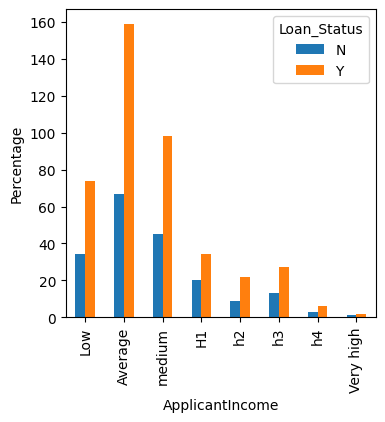

In [6]:
import matplotlib.pyplot as plt
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

### Histogram and Box plot

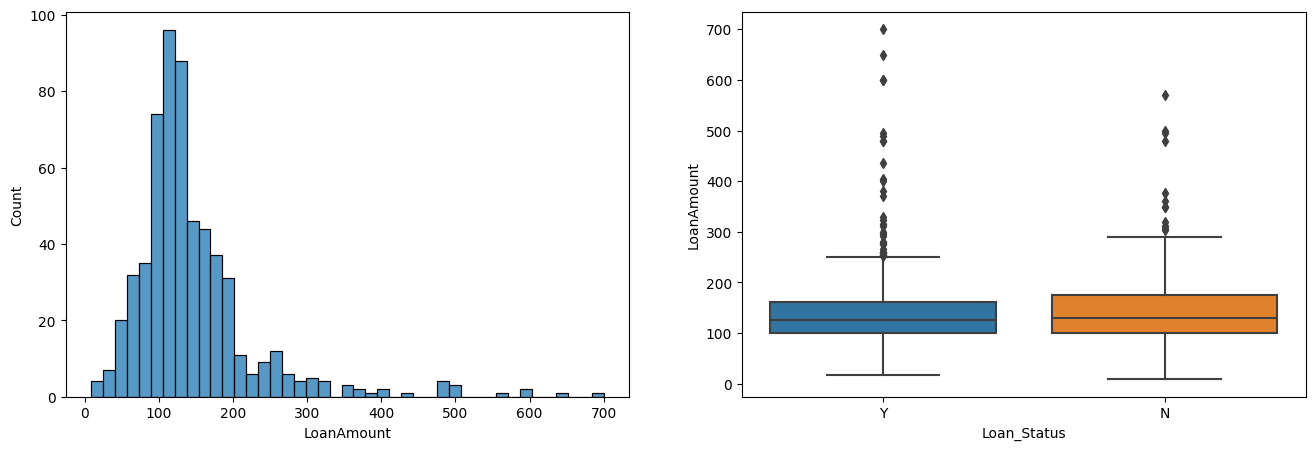

In [9]:
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(df['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=df, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [26]:
df_numeric = df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]]

### Heatmap

<Axes: >

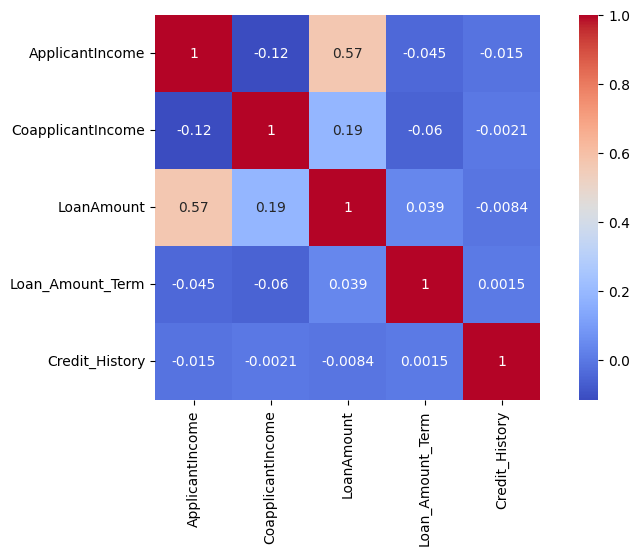

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(method="pearson"),square=True,annot=True,cmap="coolwarm")

### Filling missing values

In [35]:
from sklearn.impute import SimpleImputer

df = pd.read_csv("data/loan.csv")

# Fills the missing value  in numerical variable with mode(most_frequent_value)
num_missing = [  'LoanAmount',  'Loan_Amount_Term']
median_imputer = SimpleImputer(strategy = 'median')
for col in num_missing:
    df[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(df[col])))

# Fills the missing value  in categorical variable with mode(most_frequent_value)
cat_missing = ['Gender', 'Married','Dependents']

freq_imputer = SimpleImputer(strategy = 'most_frequent') # mode
for col in cat_missing:
    df[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(df[col])))

### Handling dates

In [ ]:
from datetime import datetime
def date_process(df):
    df["date"] = pd.to_datetime(df["date"], format="%Y%m%d") # seting the column as pandas datetime
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    
    return df #returning the df after the transformations

In [ ]:
df_train = date_process(df_train)
df_train.head(5)